In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import random
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
target=df[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
target

<ipython-input-7-ee75fcb1991b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target=df[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])


,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
x=df.drop(['Id','Species'],axis=1)
y=df['Species']
print(x)
print(y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

In [ ]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [ ]:
sc=StandardScaler()
scaller=sc.fit(trainx)
trainx_scalled=scaller.transform(trainx)
testx_scalled=scaller.transform(testx)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_clf= MLPClassifier(hidden_layer_sizes=(200),max_iter=300,activation='relu',solver='adam')
mlp_clf.fit(trainx_scalled,trainy)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=200, max_iter=300)

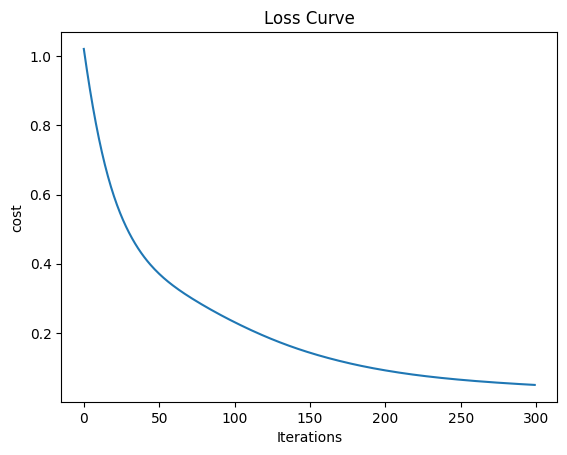

In [ ]:
plt.plot(mlp_clf.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('cost')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
 # Import plot_confusion_matrix separately

y_pred=mlp_clf.predict(testx_scalled)

print(y_pred)
print('Accuracy:{:.2f}'.format(accuracy_score(testy,y_pred)))

print(confusion_matrix(testy,y_pred))
print(classification_report(testy,y_pred))

['Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor']
Accuracy:0.93
[[ 9  0  0]
 [ 0  7  2]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.86      1.00      0.92        12

       accuracy                           0.93        30
      macro avg       0.95      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



In [ ]:
print(testy)

91     Iris-versicolor
32         Iris-setosa
10         Iris-setosa
116     Iris-virginica
30         Iris-setosa
142     Iris-virginica
43         Iris-setosa
130     Iris-virginica
29         Iris-setosa
65     Iris-versicolor
111     Iris-virginica
128     Iris-virginica
80     Iris-versicolor
20         Iris-setosa
83     Iris-versicolor
145     Iris-virginica
1          Iris-setosa
9          Iris-setosa
109     Iris-virginica
149     Iris-virginica
110     Iris-virginica
112     Iris-virginica
100     Iris-virginica
54     Iris-versicolor
148     Iris-virginica
49         Iris-setosa
77     Iris-versicolor
97     Iris-versicolor
94     Iris-versicolor
74     Iris-versicolor
Name: Species, dtype: object


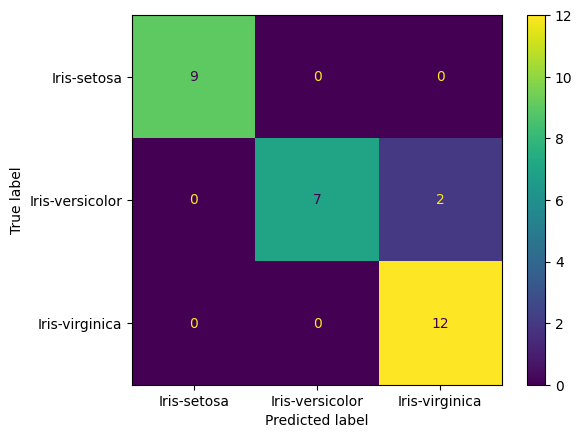

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming confusion_matrix and mlp_clf.classes_ are defined
fig = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(testy, y_pred),
                             display_labels=mlp_clf.classes_)
fig.plot()  # This renders the confusion matrix
plt.show()  # Show the plot


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.data.shape

(150, 4)

In [ ]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
df=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
df['target']=iris_data.target
x=iris_data.data
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [51]:

df.groupby('target').size()


,0
target,
0,50
1,50
2,50


In [52]:
import random
## print a random number between 1 and 1000.
print(random.randint(1, 1000))
# if you want to get the same random number again then,
random.seed(5)
print(random.randint(1, 1000))

377
638


In [53]:
random.seed(15) # if you want to get the same random number again then,
# If seed function is not used, it gives totally unpredictable responses.
### Manually segrating train and Test Samples
def separate_data():
 A = iris_dataset[0:40]
 tA = iris_dataset[40:50]
 B = iris_dataset[50:90]
 tB = iris_dataset[90:100]
 C = iris_dataset[100:140]
 tC = iris_dataset[140:150]
 train = np.concatenate((A,B,C)) ### 80 Percent Training
 test = np.concatenate((tA,tB,tC)) ### 20 Percent Test
 return train,test
iris_dataset = np.column_stack((iris_data.data,iris_data.target.T)) #Join X and Y
# Splitting data
Filetrain, Filetest = separate_data()
## converting train and test data to list for shuffling the data
Filetrain = list(Filetrain)
Filetest = list(Filetest)
#Shuffling samples
random.shuffle(Filetrain)
random.shuffle(Filetest)
## Separating features and labels for training
x_train = np.array([i[:4] for i in Filetrain])
y_train = np.array([int(i[4]) for i in Filetrain])
# One-hot encoding of y_train
n = np.max(y_train)+1
y_train = np.eye(n)[y_train]
print(y_train.shape)
print(y_train)
## Separating features and labels for testing
x_test = np.array([i[:4] for i in Filetest])
y_test = np.array([i[4] for i in Filetest])
print(y_test)
y_test = np.asarray(y_test, dtype = 'int')
print(y_test.shape)
print(y_test)
# One-hot encoding of y_train
n = np.max(y_test)+1
y_test = np.eye(n)[y_test]
y_test= np.reshape(y_test, (len(x_test),3))
print(y_test.shape)


(120, 3)
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0.

<ipython-input-54-91602fd3f011>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm.viridis)
<ipython-input-54-91602fd3f011>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_train[:,2],x_train[:,3],c=y_train,cmap=cm.viridis)


Text(0, 0.5, 'petal width (cm)')

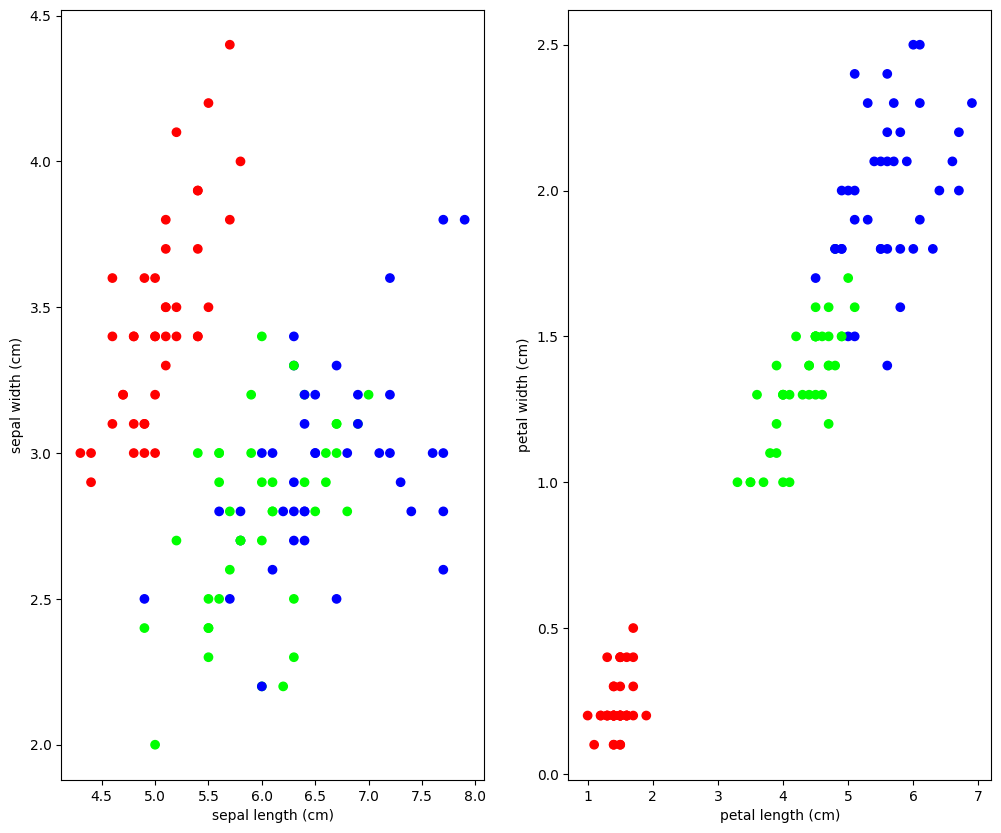

In [54]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.figure(figsize=(12,10))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])
plt.subplot(1, 2, 2)
plt.scatter(x_train[:,2],x_train[:,3],c=y_train,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[2])
plt.ylabel(iris_data.feature_names[3])


<ipython-input-55-c9b9f79edf31>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap=cm.viridis)
<ipython-input-55-c9b9f79edf31>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_test[:,2],x_test[:,3],c=y_test,cmap=cm.viridis)


Text(0, 0.5, 'petal width (cm)')

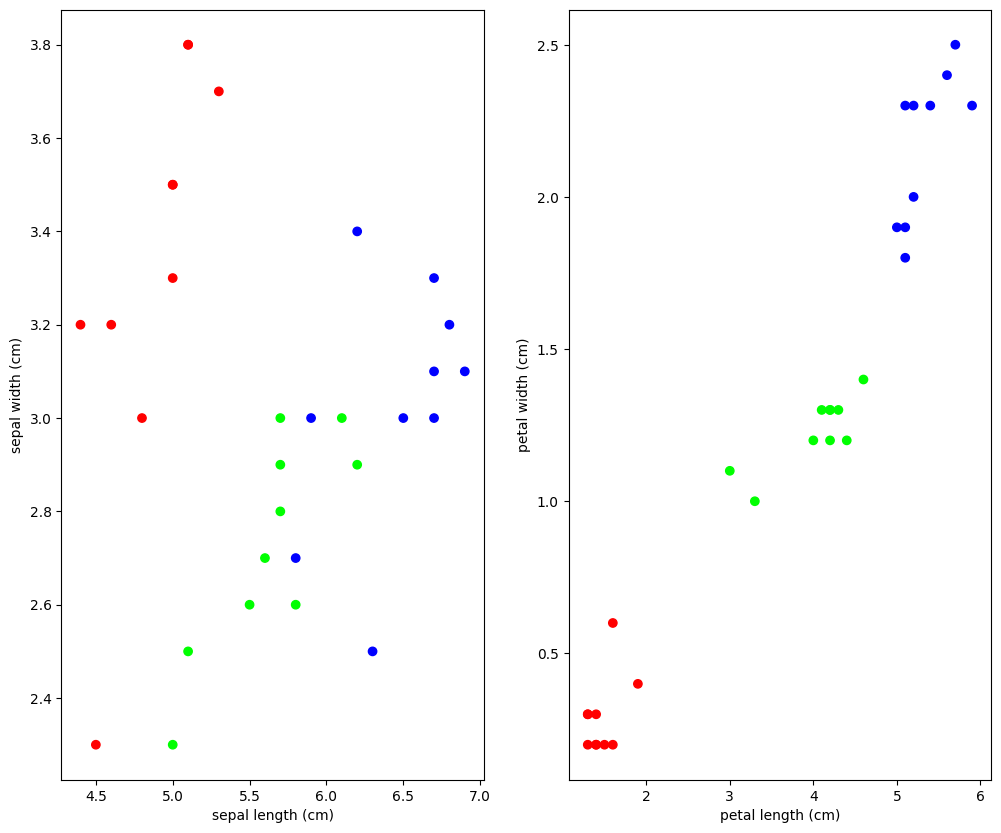

In [55]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.figure(figsize=(12,10))
plt.subplot(1, 2, 1)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])
plt.subplot(1, 2, 2)
plt.scatter(x_test[:,2],x_test[:,3],c=y_test,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[2])
plt.ylabel(iris_data.feature_names[3])


# **Scratch Method**

In [57]:
random.seed(15)
def initialize_params(x_train):
 w1 = np.random.randn(5, x_train.shape[1])
 w2 = np.random.randn(3, 5)
 b1 = np.random.randn(5, 1)
# b1 = np.zeros((5, 1))
 b2 = np.random.randn(3, 1)
# b2 = np.zeros((3, 1))
 return w1,w2,b1,b2
def softmax_act(x):
 s = np.exp(x-max(x))/((np.exp(x-max(x))).sum())
 return s
def sigmoid_act(X):
 s = 1/(1+np.exp(-X))
 return s
def derivative_soft(s):
 d = np.zeros((len(s),len(s)))
 for i in range(len(s)):
    for j in range(len(s)):
      if i == j:
        delta = 1
      else:
        delta = 0
      d[i,j] = s[i]*(delta-s[j])
 return d
def forward_path(X,w1,b1,w2,b2):
 z1 = np.reshape(np.matmul(w1, X.T),b1.shape)+b1 ### output of hidden layer
 A1 = sigmoid_act(z1)
 z2 = np.matmul(w2, A1)+b2
 A2 = softmax_act(z2) ### output
 return A2,A1

def backward_path(A2,A1,w2,Y,X):
# dA2 = Y/A2 ## gradient of loss with respect to A2
 Y = np.reshape(Y,A2.shape)
 dz2 = (A2-Y) ## gradient of loss with respect to z2
 dw2 = np.matmul(dz2,A1.T) ## gradient of loss with respect to w2
 db2 = dz2.sum(axis=1) ## gradient of loss with respect to b2

 dA1 = np.matmul(w2.T,dz2) ## gradient of loss with respect to A1
 dz1 = np.multiply(dA1,(A1*(1-A1))) ## gradient of loss with respect to z1
 dw1 = dz1*X ## gradient of loss with respect to w1
 db1 = dz1.sum(axis=1) ## gradient of loss with respect to b1
 return dw2,dw1,db2,db1
def update_params(w,b,dw,db,learning_rate):
 w = w - learning_rate * dw
 db = np.reshape(db,b.shape)
 b = b - learning_rate * db
 return w,b
def compute_cost(y_hat,y):
 cost = np.mean(y*(np.log(y_hat+10**-7)))
 return -cost

In [59]:
## SGD
num_iters = 200
learning_rate = 0.001
his1 = []
w1,w2,b1,b2 = initialize_params(x_train)
print(w1,w2,b1,b2)
for i in range(num_iters):
 cost = 0
 for j in range(len(x_train)):
  A2, A1 = forward_path(x_train[j],w1,b1,w2,b2)
  y_pred = A2
  cost += compute_cost(y_pred, y_train[j])
  dw2,dw1,db2,db1 = backward_path(A2,A1,w2,y_train[j],x_train[j])
  w2,b2 = update_params(w2,b2,dw2,db2,learning_rate)
  w1,b1 = update_params(w1,b1,dw1,db1,learning_rate)
 his1.append(cost/len(x_train))
# print('Cost at iteration ' + str(i+1) + ' = ' + str(cost) + '\n')

[[-1.55735212 -0.08276118  0.50735191 -0.36434288]
 [-0.4332703   0.82116254  0.36002931  0.58925178]
 [ 0.12604031  0.85419986 -0.25712515 -0.51209878]
 [-0.62055028 -0.83859334  0.15911707  1.09729314]
 [ 1.90477714  1.14222894 -1.62708349 -1.19377628]] [[ 1.41002044 -0.23757796  1.08504485  1.08328818  0.1005172 ]
 [ 1.22744605 -0.15354001 -2.04485885 -0.44651216 -0.80176783]
 [ 0.25984603  0.03023029 -2.06029978 -0.91987344 -0.3403316 ]] [[-0.27051968]
 [ 0.71599122]
 [-0.10144128]
 [-0.54203258]
 [ 0.37770664]] [[-1.22824489]
 [ 0.33629239]
 [ 1.56451475]]


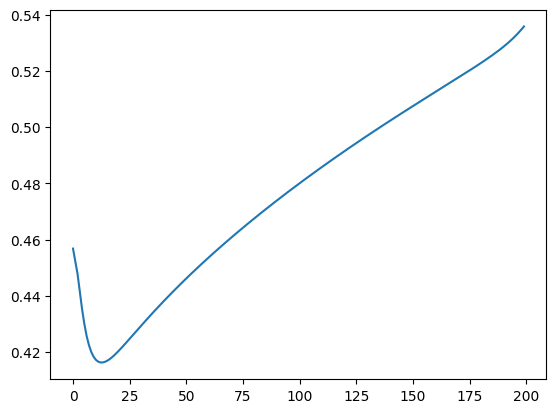

In [60]:
his = np.reshape(np.array(his1),(len(his1)))
plt.plot(his)

In [61]:
print(w1)
print(w1.shape)
print(b1)


[[-1.5539196  -0.08056914  0.5079278  -0.36456282]
 [-0.39327495  0.79550781  0.45554696  0.62328078]
 [ 0.15935598  1.39200647 -1.38389387 -1.01858859]
 [-0.73781376 -0.88717279  0.04643918  1.05409336]
 [ 1.61280104  1.01166319 -1.88307551 -1.2881964 ]]
(5, 4)
[[-0.26977431]
 [ 0.7182109 ]
 [-0.00205894]
 [-0.55965415]
 [ 0.33264284]]


In [62]:
print(w2)
print(w2.shape)
print(b2)


[[ 1.41031867 -0.42353116  2.37172057  1.07397733  0.04759745]
 [ 1.22786199  0.14322358 -2.34454365 -0.44506306 -0.33984114]
 [ 0.25913187 -0.0805801  -3.04729071 -0.91201169 -0.74933854]]
(3, 5)
[[-1.30889804]
 [ 0.68851719]
 [ 1.29294308]]


In [63]:
y_pred = np.zeros(len(y_test))
for i in range(int(len(x_test))):
 A2, A1 = forward_path(x_test[i],w1,b1,w2,b2)
# print(A2)
 A2 = np.argmax(A2,axis=0)
 y_pred[i] = A2
y_pred_class=y_pred
print("Predicted")
print(y_pred_class)
print(" Target")
# y_pred=np.array(y_pred)
y_test_class=np.argmax(y_test, axis=1)
print(y_test_class)


Predicted
[1. 1. 1. 0. 2. 2. 0. 2. 1. 0. 2. 2. 0. 0. 1. 0. 2. 1. 1. 1. 2. 1. 0. 0.
 1. 0. 2. 0. 2. 2.]
 Target
[1 1 1 0 2 2 0 2 1 0 2 2 0 0 1 0 2 1 1 1 2 1 0 0 1 0 2 0 2 2]


<ipython-input-63-13c944c06d88>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = A2


In [64]:
print('No.of wrong predictions = ',sum(y_pred_class!=y_test_class))

No.of wrong predictions =  0


# **Quality Model**

In [67]:
def parameters(cm,classes):
 cmr = np.sum(cm,axis =0) # row wise sum
 cmc = np.sum(cm,axis =1) # column wise sum
 cls_pre = []
 cls_re = []
 cls_F1 = []
 cls_acc = []
 for i in classes:
  TP = cm[i][i]
  FP = (cmr[i]-TP).astype(float)
  FN = (cmc[i]-TP).astype(float)
  TN = (np.sum(cm,axis=(0,1))-TP-FP-FN).astype(float)
  p = TP/(TP+FP)
  r = TP/(TP+FN)
  f = (2*p*r)/(p+r)
  acc = (TP+TN)/(np.sum(cm))
  cls_pre.append(p)
  cls_re.append(r)
  cls_F1.append(f)
  cls_acc.append(acc)
 return cls_pre,cls_re,cls_F1,cls_acc
## Code for confusion matrix
classes = [0,1,2]
def confusionmatrix(no_of_classes,y_test,y_pred):
 cm = []
 for col in range(no_of_classes):
  c = np.zeros(no_of_classes)
  for row in range(no_of_classes):
    c[row] = np.sum(np.logical_and(y_test_class==col,y_pred_class==row))
  cm.append(c)
 cm = np.array(cm,dtype='uint64')
 return cm

print('Confusion matrix :')
cm = confusionmatrix(3,y_test,y_pred)
print(cm)
print('')
cls_pre,cls_re,cls_F1,cls_acc = parameters(cm,classes)
print('Class-wise Precision:',cls_pre)
print('Class-wise Recall:',cls_re)
print('Class-wise F1 score:',cls_F1)
print('Class-wise accuracy:',cls_acc)
print('')
print('overall Precision:',np.mean(cls_pre))
print('overall Recall:',np.mean(cls_re))
print('overall F1 score:',np.mean(cls_F1))
print('Overall Accuracy:',sum(y_pred_class==y_test_class)/len(y_test_class))

Confusion matrix :
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Class-wise Precision: [1.0, 1.0, 1.0]
Class-wise Recall: [1.0, 1.0, 1.0]
Class-wise F1 score: [1.0, 1.0, 1.0]
Class-wise accuracy: [1.0, 1.0, 1.0]

overall Precision: 1.0
overall Recall: 1.0
overall F1 score: 1.0
Overall Accuracy: 1.0


In [68]:

from sklearn.metrics import*
print('confusion_matrix\n {}'.format(confusion_matrix(y_true=y_test_class, y_pred=y_pred_class)))
print('classification_report\n {}'.format(classification_report(y_true=y_test_class, y_pred=y_pred_class)))
print('Overall accuracy: ',accuracy_score(y_true=y_test_class, y_pred=y_pred_class))

confusion_matrix
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Overall accuracy:  1.0
